In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import numpy as np
from snowpack_functions import unpack_netcdf_file_var
# basins = ["cascades","california","northernrockies","southernrockies","whites","plains","nwinterior","coastalnorth","coastalsouth","southwest"]
basins = ["missouri","nwinterior","coastalnorth","coastalsouth","lower_colorado","great_basin"]
scenarios = ["historical","rcp45","rcp85"]
variables=["soilmoisture"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/summer_sm_gcms_boxplot.png'


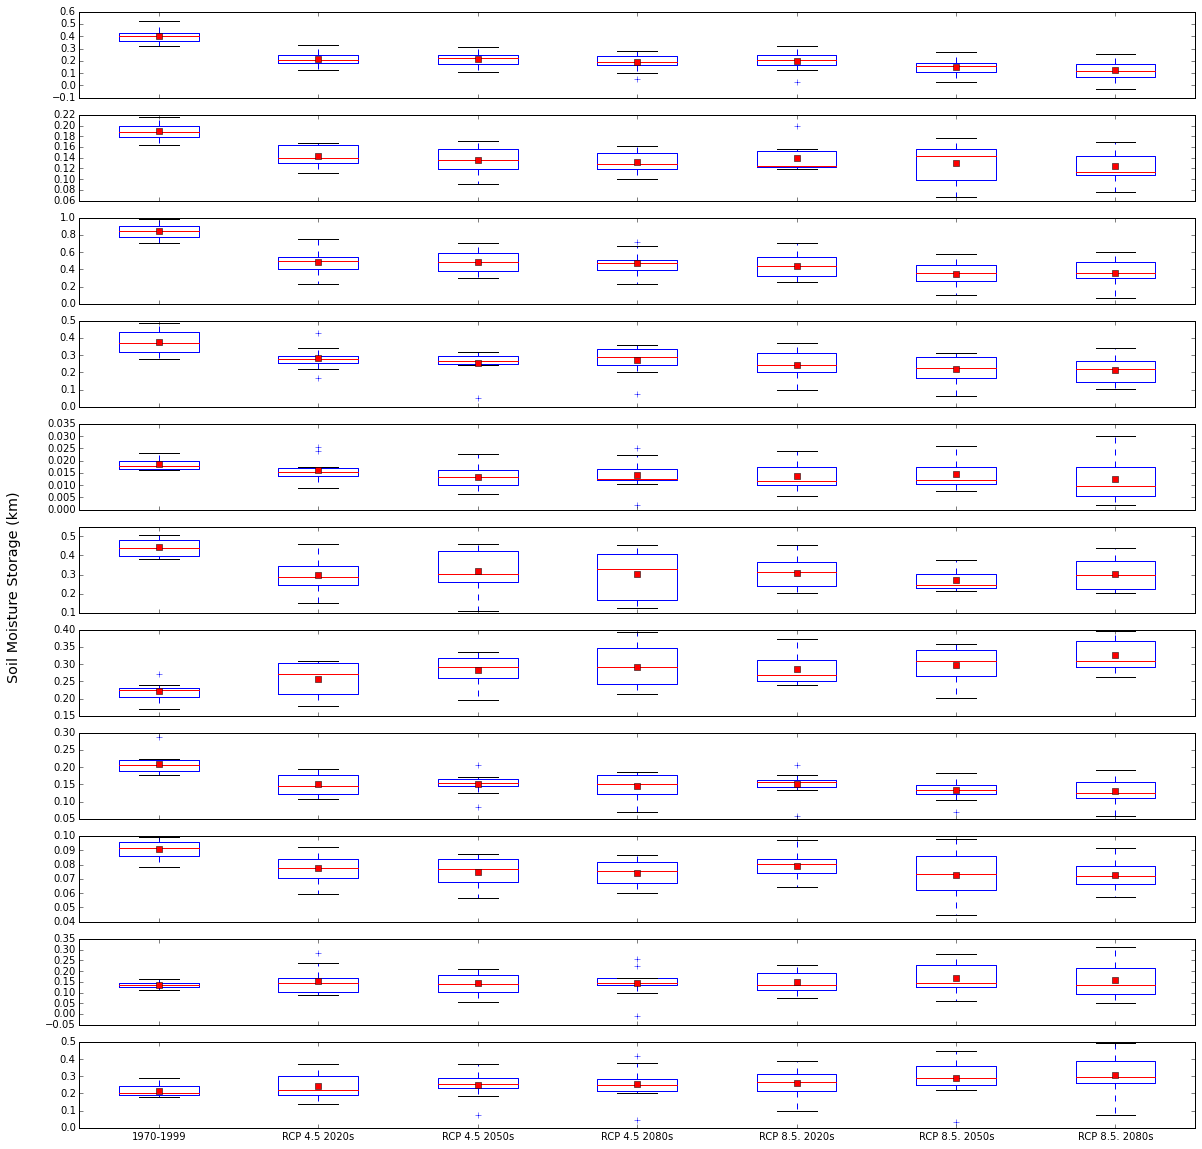

In [25]:
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri","nwinterior","coastalnorth",
          "coastalsouth","lower_colorado","great_basin"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
chunks = ['historical','rcp45','rcp45','rcp45','rcp85','rcp85','rcp85']
times = ['1970-1999','2010-2039','2040-2069','2070-2099','2010-2039','2040-2069','2070-2099']
lt = 20
rt = 20
lw = 2.0
fig,axes = plt.subplots(nrows=11,ncols=1,figsize=(lt,rt))
num = 0
for basin in basins: 
    timecount = 0
    data_allchunks = np.ndarray(shape=(10,7))
    for n in np.arange(len(times)): 
        if times[n] == "1970-1999":
            beg = 20
            endd = -6
        elif times[n] == "2010-2039":
            beg = 4
            endd = 34
        elif times[n] == "2040-2069":
            beg = 34
            endd = 64
        else:
            beg = 64
            endd = 94
        sm_gcms = np.ndarray(shape=(10,30))
        mod_count = 0
        for model in models:
            direc = '/raid9/gergel/agg_snowpack/sm_summer/'
            file = '%s_%s_%s.npz' % (basin,model,chunks[n])
            data = np.load(os.path.join(direc,file))
            sm = data['sm']

            sm_gcms[mod_count,:] = sm[beg:endd]
            mod_count += 1 
        sm_mean = sm_gcms.mean(1)
        data_allchunks[:,timecount] = sm_mean
        timecount += 1
    
    labels= ['1970-1999','RCP 4.5 2020s','RCP 4.5 2050s','RCP 4.5 2080s','RCP 8.5. 2020s',
             'RCP 8.5. 2050s','RCP 8.5. 2080s']
    fs = 15
    
    if (basin != "great_basin"):
        axes[num].boxplot(data_allchunks,labels=None,showmeans=True)
    else:
        axes[num].boxplot(data_allchunks,labels=labels,showmeans=True)
    
    if (basin != "great_basin"):
        plt.setp(axes[num].get_xticklabels(), visible=False)
    
    num += 1

    '''if (scenario == "historical"):
        ax = fig.add_subplot(11,3,num+1) 

    else: 
        ax = fig.add_subplot(11,3,num+1,sharey=ax) 
        plt.setp(ax.get_yticklabels(), visible=False)


    if (basin != "great_basin"):
        plt.setp(ax.get_xticklabels(), visible=False)
    else: 
        ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
        ax.autoscale_view()


    ax.plot_date(dates,swe_gcms.mean(0),fmt='-',color='r',label='SM',linewidth=lw)
    ax.fill_between(dates,swe_gcms.min(0),swe_gcms.max(0),color='grey',alpha=0.3)
    ax.fill_between(dates,np.percentile(swe_gcms,25,0),np.percentile(swe_gcms,75,0),color='grey',alpha=0.8)

    # plt.ylim((-8,25))


    if num == 0:
        ax.set_title('Historical')
    elif num == 1: 
        ax.set_title('RCP 4.5')
    elif num == 2:
        ax.set_title('RCP 8.5')

    num += 1
    '''


fig.text(0.075, 0.5, 'Soil Moisture Storage (km)', va='center', rotation='vertical',size = 'x-large')



## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'summer_sm_gcms_boxplot.png' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

In [9]:
data_allchunks.shape

(10, 7)